# NLP Assignment 1 - Part 1 Deep Learning Approach

Transformers have revolutionized the field of natural language processing, making them a pivotal choice for deep learning approaches in tasks involving human language. Their ability to process sequential data in parallel and their attention mechanism allow for a more nuanced understanding of context and semantics in text, which is essential for interpreting complex, human-written responses. By employing transformers in this assignment, we not only apply and understand their advanced capabilities in language modeling but also align with the course's focus on transformers. This approach offers a practical way to explore and understand the abilities of transformer models. Furthermore, using transformers provides an opportunity to compare their performance with traditional methods, which helps our understanding of their strengths and limitations in real-world applications.

### Preprocessing and cleaning of the documents

In the preprocessing and cleaning phase for deep learning models, like those based on transformer architectures like BERT and RoBERTa, the approach to handling text data differs significantly from traditional machine learning methods. Traditional approaches often rely on meticulous cleaning and preprocessing steps, such as removing stop words, stemming, and lemmatization, to transform raw text into a more structured format like Bag-of-Words or TF-IDF vectors. However, for deep learning models, especially transformers, the raw text's nuances are vital as they provide rich contextual information. The tokenization process in transformers is designed to capture this context; it involves breaking down the text into tokens (words or subwords) and encoding them into numerical values. Unlike traditional methods, transformers can benefit from the subtleties in language usage, such as word order and syntactic nuances, which are crucial for understanding the underlying meaning and sentiment of the text.

Moreover, special tokens play a critical role in transformers. The [CLS] token, added at the beginning of each text, serves as an aggregate representation of the entire input sequence, crucial for classification tasks. The [SEP] token, used to separate different parts of the text or to denote the end of a single input, helps the model distinguish between separate segments within the input. Padding is also an essential aspect of preprocessing for these models; it ensures that all input sequences are of the same length for batch processing. Padding tokens are added to shorter sequences to match the length of the longest sequence in a batch, allowing the model to process inputs uniformly. This approach to preprocessing, focused on preserving and understanding the context, is fundamental to the success of deep learning models in capturing the subtleties and complexities of human language in text classification tasks.

The utilization of BERT and RoBERTa is advantageous due to their advanced language understanding capabilities, stemming from extensive pre-training on diverse text corpora. The models have shown to effectively capture linguistic nuances and contextual relationships in text, which are crucial for accurately predicting personality traits based on human-written responses. Furthermore, their architectural differences provide a comprehensive comparative analysis, enhancing the robustness of our evaluation by highlighting the strengths and limitations of each model in handling the complexities of the dataset and the task at hand.


# Modeling

(see bottom of page for link to screenshots concerning the different parameter attemps, results are presented in tables)

**Baselines**

The baseline results from our experiments with BERT and RoBERTa models reveal a clear underperformance compared to fine-tuned traditional machine learning approaches in the task of personality trait binary classification. For both models we use the cased version, as the capitalization of certain words or phrases may help predicting a certain personality trait. Including RoBERTa alongside BERT for baseline comparisons leverages its optimizations, like a modified training approach and larger vocabulary, which may provide insights into performance improvements. For this baseline and the following steps, we will evaluate the prediction task on using only one personality trait (extraversion, cEXT) to identify possible challenges which we first have to overcome before we apply it to the other traits. The parameters used for these baselines are the default parameters for BERT and RoBERTa to find a clear baseline where we can head off from to improve them. (LR being 5e-5, batch size of 8). Using five epochs of training, these deep learning models have not been able to adequately capture and explain the behavior of the dataset. This is evident from the fluctuating and inconsistent metrics, particularly the F1 scores, which fall short of reaching the benchmark set by traditional ML methods, consistently hovering around 0.68. The observed patterns in training and validation losses (especially with the validation loss of RoBERTa increasing), along with precision and recall values, further indicate challenges such as overfitting and the models' struggles to generalize effectively from the training data.

Moving forward, it's crucial to focus on how transformer models like BERT and RoBERTa process and utilize text data, rather than immediately diving into hyperparameter tuning. This means closely examining their tokenization process and attention mechanisms, as well as how they handle context within the text. Understanding and refining these core aspects of the model has priority, as they lay the foundation for effective data interpretation. This structural approach ensures that the model is fundamentally sound before we attempt to enhance its efficiency and accuracy through parameter adjustments.


# Adressing the input sequence limitation

Addressing the input sequence limitation in transformers is crucial, as they come with an inherent token size limitation of 512 tokens. This means that transformers like BERT are designed to handle input sequences with a maximum of 512 tokens, including special tokens like [CLS] and [SEP]. This constraint poses a significant challenge when dealing with longer texts. A data analysis involving a plot of token lengths across our dataset reveals that a substantial number of texts exceed this 512-token limit. Consequently, when these texts are fed into the model, they are truncated to fit within this limit, leading to the potential loss of crucial information contained in the removed sections of the text. This truncation could significantly impact the model's ability to understand and interpret the full context and nuances of the text, thereby affecting its performance in tasks like classification.

To mitigate this limitation, a chunking approach is employed. This method involves splitting longer texts into smaller segments or chunks, each containing up to 512 tokens, and then processing each chunk independently (Jaiswal & Milios, 2023).

The initial run using BERT with default parameters showed a model struggling to learn, as evidenced by the zero scores in precision, recall, and F1 score in multiple epochs. This suggests that the model was not learning, possibly due to the complexity of the task. To address this, two key changes were made: reducing the learning rate from the default 5e-5 to 1e-5 and increasing the batch size from 8 to 16. A lower learning rate helps in making more gradual updates to the model's weights, potentially leading to a more nuanced understanding of the data, while a larger batch size can provide a more stable gradient for the optimization process. These adjustments led to an improvement in the learning dynamics of the model, as reflected in the results of the second run, where there was a noticeable improvement in all metrics. Highlighting here that although the validation loss was still increasing, as noticed by the RoBERTa baseline model, it is noticeable lower.

However, this approach has its drawbacks. While it ensures that no part of the text is discarded, it disrupts the continuity and interplay between different parts of the text. Each chunk is processed in isolation, which means that the model misses out on the broader context that could be understood from considering the text as a whole. This fragmentation can lead to a lack of coherence in understanding the text and may result in poorer performance compared to processing the entire text in a single go.


In [ ]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from huggingface_hub import notebook_login

notebook_login()

In [ ]:
pip install nvidia-ml-py3

  Preparing metadata (setup.py) ... done
  Created wheel for nvidia-ml-py3: filename=nvidia_ml_py3-7.352.0-py3-none-any.whl size=19171 sha256=ae7dbe2c4471e028585fbff220475557c74c024be18d54ed3c84f1eca8b9e76f
  Stored in directory: /root/.cache/pip/wheels/5c/d8/c0/46899f8be7a75a2ffd197a23c8797700ea858b9b34819fbf9e
Successfully built nvidia-ml-py3


In [ ]:
pip install datasets evaluate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 3.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 12.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 16.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 16.5 MB/s eta 0:00:00


In [ ]:
pip install accelerate -U

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 2.4 MB/s eta 0:00:00


In [ ]:
pip install transformers[torch]

In [ ]:
from pynvml import *


def print_gpu_utilization():
    nvmlInit()
    handle = nvmlDeviceGetHandleByIndex(0)
    info = nvmlDeviceGetMemoryInfo(handle)
    print(f"GPU memory occupied: {info.used//1024**2} MB.")


def print_summary(result):
    print(f"Time: {result.metrics['train_runtime']:.2f}")
    print(f"Samples/second: {result.metrics['train_samples_per_second']:.2f}")
    print_gpu_utilization()

In [ ]:
# print_gpu_utilization()

In [ ]:

answers = pd.read_csv("drive/MyDrive/Levy/english_texts.csv")

In [ ]:
# Counting the number of NaN values in each column
nan_count = answers.isna().sum()
nan_count

Unnamed: 0    0
TEXT          0
TEXT_NL       0
cEXT          0
cNEU          0
cAGR          0
cCON          0
cOPN          0
dtype: int64

In [ ]:
# Selecting only 'TEXT' and 'cEXT' columns and renaming them
df_ext = answers[['TEXT', 'cEXT']].rename(columns={'TEXT': 'text', 'cEXT': 'labels'})

# Reordering columns as per your requirement
df_ext = df_ext[['text', 'labels']]

In [ ]:
df_ext

,text,labels
0,"Well, right now I just woke up from a mid-day ...",0
1,"Well, here we go with the stream of consciousn...",0
2,An open keyboard and buttons to push. The thin...,0
3,I can't believe it! It's really happening! M...,1
4,"Well, here I go with the good old stream of co...",1
...,...,...
2958,I am motivated on a day to day basis by the ne...,1
2959,My son is the biggest part of my life and with...,1
2960,My kids and grandkids are what keeps me motiva...,1
2961,My biggest drive is to earn money so I can ret...,0


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("bert-base-cased", use_fast=True)

tokenizer_config.json:   0%|          | 0.00/29.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/436k [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], truncation=False)

In [ ]:
import pandas as pd
from datasets import Dataset

dataset = Dataset.from_pandas(df_ext)

tokenized_all = dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/2963 [00:00<?, ? examples/s]

Token indices sequence length is longer than the specified maximum sequence length for this model (804 > 512). Running this sequence through the model will result in indexing errors


In [ ]:
# Assuming tokenized_all['input_ids'] is your list of lists
tokenized_lists = tokenized_all['input_ids']

# Calculate the mean length of the tokenized samples
mean_length = sum(len(token_list) for token_list in tokenized_lists) / len(tokenized_lists)
print(mean_length)

769.2426594667567


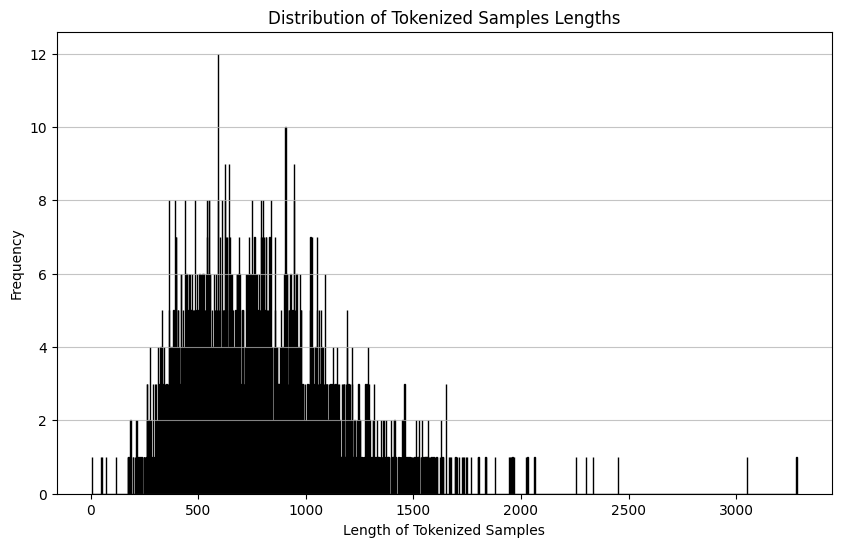

In [ ]:
import matplotlib.pyplot as plt

# Extract lengths of each tokenized list
lengths = [len(token_list) for token_list in tokenized_all['input_ids']]

# Create a bar plot to visualize the distribution of lengths
plt.figure(figsize=(10, 6))
plt.hist(lengths, bins=range(min(lengths), max(lengths) + 2), align='left', color='blue', edgecolor='black')
plt.title('Distribution of Tokenized Samples Lengths')
plt.xlabel('Length of Tokenized Samples')
plt.ylabel('Frequency')
plt.xticks(range(0, max(lengths) + 1, 500))  # Setting x-axis marks at
plt.grid(axis='y', alpha=0.75)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

# Assuming df_ext is your DataFrame with 'text' and 'labels' columns

# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(
    df_ext['text'], df_ext['labels'], random_state=42, test_size=0.4
)

# Creating a list of dictionaries for the test set
test_data = [{'label': int(label), 'text': text} for label, text in zip(y_test, X_test)]
train_data = [{'label': int(label), 'text': text} for label, text in zip(y_train, X_train)]

# Creating the final data structure
extroversion = {
    'train': train_data,
    'test': test_data
}


In [ ]:
len(extroversion['train'][0]['text'])

3936

# Longformer

Recognizing the limitations of the chunking approach with BERT, where the continuity and context of longer texts were compromised, the next step was to transition to using Longformer. Longformer (Beltagy et al., 2020), known for its capability to handle extended sequences of up to 4096 tokens, offers a solution to the problem of texts of long length in natural language processing. This model's architecture is specifically designed to maintain the integrity and coherence of longer documents, ensuring that the broader context is captured effectively, which is crucial for accurate text classification. Longformer does this by using both local and global attention. However, employing Longformer also brings its own set of challenges, particularly in terms of memory consumption due to its extended sequence length capabilities. To address this, several optimizations were necessary, including the implementation of gradient accumulation and gradient checkpointing, as well as the adoption of mixed precision training using fp16. These techniques help in managing the significantly higher memory requirements of Longformer. Additionally, the utilization of Colab Pro equipped with a V100 GPU was required to provide the necessary computational resources, as the free GPU time of Colab time outed continuously. The shift to Longformer, supported by these technical optimizations, represents a strategic move to better accommodate the demands of processing long textual data, aiming for a more coherent and contextually-aware model performance.


In [ ]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained("allenai/longformer-base-4096", use_fast=True, max_length=2048)

config.json:   0%|          | 0.00/694 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [ ]:
def preprocess_function(examples):
    return tokenizer(examples["text"], padding= 'max_length', truncation=True, max_length=2048)

In [ ]:
from datasets import Dataset

train_dataset = Dataset.from_pandas(pd.DataFrame(extroversion['train']))
test_dataset = Dataset.from_pandas(pd.DataFrame(extroversion['test']))

tokenized_train = train_dataset.map(preprocess_function, batched=True)
tokenized_test = test_dataset.map(preprocess_function, batched=True)

Map:   0%|          | 0/1777 [00:00<?, ? examples/s]

Map:   0%|          | 0/1186 [00:00<?, ? examples/s]

In [ ]:
len(tokenized_train['input_ids'][0])

2048

In [ ]:
from transformers import DataCollatorWithPadding

data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
import numpy as np
import evaluate

accuracy_metric = evaluate.load("accuracy")
precision_metric = evaluate.load("precision")
recall_metric = evaluate.load("recall")
f1_metric = evaluate.load("f1")

def compute_metrics(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)

    accuracy = accuracy_metric.compute(predictions=predictions, references=labels)["accuracy"]
    precision = precision_metric.compute(predictions=predictions, references=labels)["precision"]
    recall = recall_metric.compute(predictions=predictions, references=labels)["recall"]
    f1score = f1_metric.compute(predictions=predictions, references=labels)["f1"]
    return {"accuracy": accuracy, "precision": precision, "recall": recall, "f1score": f1score}

In [ ]:
id2label = {0: "NEGATIVE", 1: "POSITIVE"}
label2id = {"NEGATIVE": 0, "POSITIVE": 1}

In [ ]:
from transformers import LongformerConfig, LongformerModel

# Initializing a Longformer configuration

configuration = LongformerConfig.from_pretrained(
    "allenai/longformer-base-4096",
    attention_window=2048,
    num_labels=2,
    id2label=id2label,
    label2id=label2id
)

In [ ]:
configuration

LongformerConfig {
  "attention_mode": "longformer",
  "attention_probs_dropout_prob": 0.1,
  "attention_window": 2048,
  "bos_token_id": 0,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "NEGATIVE",
    "1": "POSITIVE"
  },
  "ignore_attention_mask": false,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "NEGATIVE": 0,
    "POSITIVE": 1
  },
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 4098,
  "model_type": "longformer",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "onnx_export": false,
  "pad_token_id": 1,
  "sep_token_id": 2,
  "transformers_version": "4.35.2",
  "type_vocab_size": 1,
  "vocab_size": 50265
}

In [ ]:
from transformers import LongformerForSequenceClassification

model = LongformerForSequenceClassification.from_pretrained(
    "allenai/longformer-base-4096",
    config=configuration
)


pytorch_model.bin:   0%|          | 0.00/597M [00:00<?, ?B/s]

Some weights of LongformerForSequenceClassification were not initialized from the model checkpoint at allenai/longformer-base-4096 and are newly initialized: ['classifier.dense.weight', 'classifier.dense.bias', 'classifier.out_proj.weight', 'classifier.out_proj.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
output_dir = '/content/drive/MyDrive/Levy/longformer_huggingface_v100'


In [ ]:
from transformers import TrainingArguments, Trainer, logging

logging.set_verbosity_error()

In [ ]:
print_gpu_utilization()

GPU memory occupied: 233 MB.


In [ ]:
training_args = TrainingArguments(
    output_dir=output_dir,
    learning_rate=1e-5,
    per_device_train_batch_size=8,
    per_device_eval_batch_size=16,
    num_train_epochs=10,
    warmup_steps=25,
    weight_decay=0.02,
    logging_steps = 4,
    disable_tqdm=False,
    evaluation_strategy="epoch",
    save_strategy="epoch",
    load_best_model_at_end=True,
    push_to_hub=False,
    gradient_accumulation_steps=8,
    gradient_checkpointing=True,
    fp16=True,
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=tokenized_train,
    eval_dataset=tokenized_test,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

result = trainer.train()
print_summary(result)

/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1score
0,0.698600,0.694213,0.494941,0.516908,0.176568,0.263223
1,0.697000,0.690513,0.528668,0.530013,0.684818,0.597552
2,0.679900,0.683506,0.558179,0.556319,0.668317,0.607196
3,0.655900,0.688479,0.564924,0.549559,0.823432,0.659181
4,0.625400,0.679874,0.564924,0.568807,0.613861,0.590476
5,0.602500,0.684071,0.575885,0.565107,0.737624,0.639943
6,0.560600,0.688761,0.580944,0.602637,0.528053,0.562885
8,0.563000,0.686454,0.591906,0.589971,0.660066,0.623053
9,0.576200,0.687131,0.590219,0.589552,0.651815,0.619122


/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.utils.checkpoint: please pass in use_reentrant=True or use_reentrant=False explicitly. The default value of use_reentrant will be updated to be False in the future. To maintain current behavior, pass use_reentrant=True. It is recommended that you use use_reentrant=False. Refer to docs for more details on the differences between the two variants.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torch/utils/checkpoint.py:429: UserWarning: torch.

Time: 10456.18
Samples/second: 1.70
GPU memory occupied: 15779 MB.


In [ ]:
# save the best model
trainer.save_model('/content/drive/MyDrive/Levy/models/longformer_10_1e-5_0.02')


In [ ]:
trainer.evaluate()

{'eval_loss': 0.6798735857009888,
 'eval_accuracy': 0.5649241146711635,
 'eval_precision': 0.5688073394495413,
 'eval_recall': 0.6138613861386139,
 'eval_f1score': 0.5904761904761905,
 'eval_runtime': 127.4612,
 'eval_samples_per_second': 9.305,
 'eval_steps_per_second': 0.588,
 'epoch': 9.69}

In [ ]:
print_gpu_utilization()

GPU memory occupied: 15779 MB.


Longformer
A Longformer model was created and trained, with the selected learning rate being used the same as in the paper which proposed the model (Beltagy et al., 2020), 5 epochs, an effective batch size of 32 (training batch size 4 with gradient accumulation of 8), and 25 warmup steps. The warmup steps were used to slowly tune the attention mechanism of the longformer. This Longformer model's performance, in comparison to the initial baselines (BERT and RoBERTa) and the BERT model with modified token handling, demonstrates a more consistent and stable learning pattern.

- Training and Validation Loss: A consistent decrease in both training and validation loss across epochs indicates effective learning and good generalization to unseen data. Highlighting than in previous models we have not seen a decrease in validation loss.
- Accuracy and F1 Score: The final F1 score (0.604959) in the Longformer model is the result of a steady increase in performance across epochs, contrasting the earlier models' inconsistent performances.
- Precision and Recall: The model maintains a balance between precision and recall, avoiding heavy biases towards false positives or false negatives, crucial for reliable classification.
- Comparison with Baselines: Longformer demonstrates more stability and less overfitting compared to the baselines, indicating its potential in handling long text sequences effectively.
- Optimizations and GPU Utilization: Utilizing a V100 GPU allowed for an increase in batch size. A higher batch size is important as it provides more stable and accurate gradient estimates during training, which is particularly beneficial for complex models like - Longformer dealing with extensive data.
Runtime Considerations: The increased runtime, around 1.5 hours, is high but somewhat reasonable given the model's complexity and the depth of data processing involved.

With the Longformer showing potential through its results, the next steps involved fine-tuning the model further to enhance its performance. This included decreasing the learning rate to allow for more gradual updates to the model's weights, increasing the number of epochs from 5 to 10 for extended learning, and slightly raising the weight decay to 0.02 to combat potential overfitting. These adjustments aimed to refine the model's ability to learn from the data while maintaining a balance to prevent overfitting.
The validation loss, after initially decreasing, began to slightly increase after the fourth epoch, suggesting possible overfitting despite the increased weight decay. Precision and recall, key indicators of the model's classification ability, were actually higher in the earlier 5-epoch model compared to this extended training model. This outcome highlights a potential limitation in extending the training duration under the current model configuration. Although the model appeared to learn the training data more effectively (as shown by the lower training loss), its ability to generalize this learning to new, unseen data (as reflected in the validation loss and precision-recall metrics) did not improve as expected.
The training of the two Longformer models, despite their extended duration, has highlighted using deep learning models which are capable of processing full input sequences: the trade-off between computational resources and model capability. The Longformer's design to handle longer texts allows for a comprehensive understanding of the entire input, which is crucial in tasks like personality trait prediction where context and nuance are key. However, this comes at a considerable computational cost, highlighting the importance of strategic model selection and optimization rather than iterative experimentation with different settings. Therefore, the next logical step is hyperparameter tuning. By fine-tuning these models, we aim to optimize the model's ability to capture the full extent of the input data, thereby enhancing performance.

**see hyper parameter tuning notebook for process, results are shared here below**

# Hyperparameter tuning
In the context of a business application where efficiency and rapid iteration are key, we opted to focus on hyperparameter tuning the BERT model with the modified token length instead of the more computationally intensive Longformer. This choice was also in line with the approach to (partly) incorporate the full text length into our model (not the ideal approach since chunks are used, but deemed sufficiently robust given the constraints). This decision was driven by the need for quicker training cycles (BERT models require approximately 20 minutes per run, significantly less than the nearly 3-hour runtime of Longformer models), making it more feasible for iterative experimentation and faster deployment.

For the hyperparameter optimization of the BERT model, a Bayesian search strategy was employed with Weights & Biases (wandb). This approach intelligently navigates the hyperparameter space by building a probabilistic model that predicts the performance outcome from different hyperparameters, learning from the results of past evaluations. It's particularly advantageous over a grid search as it converges to the best solution (to a specific goal) with fewer iterations, saving time and computational resources. The search space included the learning rate, with a uniform distribution, ranging from the default 5e-5 to a finer 1e-5, as well as batch sizes of either 32 or 64 and epoch counts of 5 or 10. In total, 15 runs were performed, with a total duration of over 3 and a half hours. While the validation loss decreased across different configurations, more heavily at the beginning than the end, it eventually plateaued. Wandb analysis pinpointed the learning rate as the most influential parameter for minimizing evaluation loss, highlighting its role in model optimization.

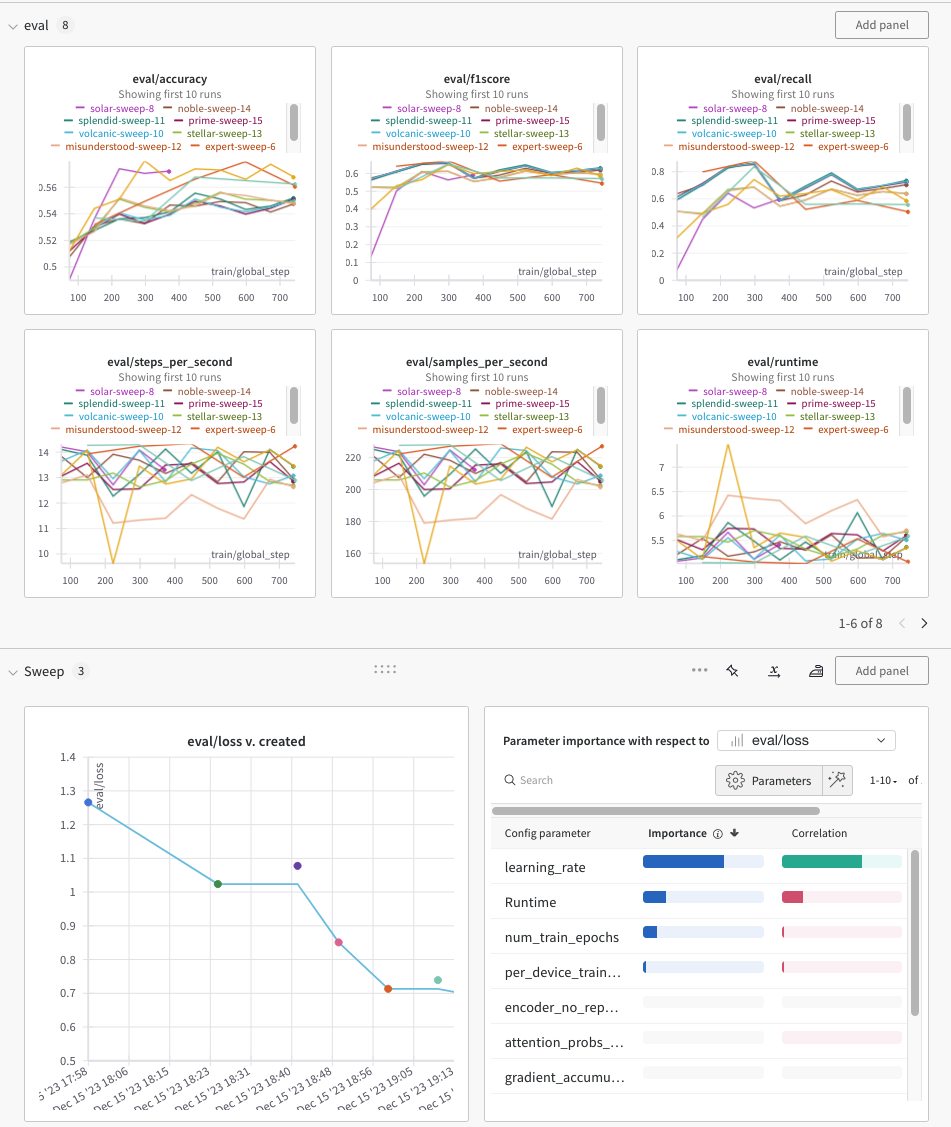

The hyperparameter search concluded with parameters, when filtered on the final evaluation loss and checking if the training loss also decreased, being of learning rate 5e-6, 5 epochs and a total effective batch size of 64. The run where these parameters were found also had the highest scoring balance between precision and recall, highlighting their importance in using them as a metric to evaluate models.

Despite the observed stagnation, the process of hyperparameter tuning using the Bayesian approach has provided crucial insights into the inherent limitations of the prediction task for the extraversion class. By systematically exploring various model configurations, we have gained a better understanding of the performance ceiling for the extraversion trait classification. Armed with this knowledge, we can now apply the best hyperparameters identified through this process to the remaining four predictors. This next step will allow us to evaluate their performance and further understand the broader applicability and constraints of our model within the scope of personality trait prediction.


# Remaining four predictors

For the prediction of the four remaining personality traits (neuroticism, agreeableness, conscientiousness, and openness) we employed a BERT model using a text chunking approach to manage the input text size. Each trait presented unique outcomes in terms of model performance and optimization:

- Neuroticism: The model achieved a balance between precision and recall. This balance indicates that the model was equally good at identifying true cases (precision) and capturing the majority of these cases present in the dataset (recall). Final F1 score of around 0.54.

- Agreeableness: This trait was characterized by a relatively higher recall rate, suggesting that the model was particularly effective at identifying most instances of agreeableness. However, an issue was the lack of a decreasing trend in validation loss, indicating potential challenges in model generalization. Final F1 score of around 0.63 indicating model being quite well for this personality trait.

- Conscientiousness: The model's performance on conscientiousness showed no consistent validation loss over time, as the loss kept the same, likewise or with agreeableness. Final F1 score of around 0.61, which may be skewed due to no generalization.

- Openness: For openness, the model demonstrated a strong decrease in validation loss over time, compared to the other personality traits, coupled with a great balance between precision and recall. Due to the good score, we are interested in further refinement of the model's performance on openness. We do this with a larger learning rate of 1e-5 for 10 epochs. A bigger learning rate could potentially facilitate more rapid adjustments in the model's weights, enabling it to learn faster and more effectively from the training data. Applying this resulted in a model with a validation loss which increased, potentially informing that the increase in learning rate did not help the model and actually made it worse.

In summary, our use of diverse transformer models and hyperparameter tuning has addressed the prediction of various personality traits. These advanced models have shown varying success in understanding complex textual data. The next crucial step is to compare these deep learning methods with traditional machine learning approaches. This will reveal the relative strengths and practicality of each method in the context of binary classification of personality trait prediction, which helps towards understanding and following steps for part 2 and 3.

# Conclusion

In the binary classification prediction, the Longformer model demonstrated better performance than BERT and RoBERTa which can be caused by dealing with the input sequence limitation. Specifically tailored for longer sequences, Longformer outperformed the other architectures, achieving an F1 score of around 0.61. While this score isn't exceptionally high, the Longformer was the only model showing a consistent decrease in validation loss. In contrast, attempts to modify BERT for full input sequence coverage through chunking, which unfortunately disrupts text interplay, did not yield significantly better results. The highest F1 score achieved, around 0.61 for the personality trait openness, highlights that predicting personality traits through binary classification is a complex challenge for transformer-based models.

# Comparison with ML based approaches


In the binary classification of personality traits, a comparison between machine learning and deep learning approaches reveals notable differences in performance and characteristics. The ML approaches, employing SVM and XGBoost with various vectorization techniques, highlighted a trait-dependent variability in performance. Conscientiousness, for instance, showed the highest F1 scores with SVM (average of 0.683), whereas Neuroticism was less effectively predicted (average F1 of 0.536). XGBoost in essence performed better than SVM, with slightly higher overall F1 scores, indicating that it was generally more robust across different personality traits. The macro-averaged results suggest that XGBoost slightly outperforms SVM, but both methods showed a tendency towards high recall and lower precision, indicating a proficiency in identifying texts related to certain personality traits but a lack of accuracy in confirming the absence of those traits.

On the other hand, the DL approaches, primarily utilizing transformer models like BERT, RoBERTa, and Longformer, faced challenges in handling the complexity of personality trait prediction. This was highlighted by the mere performance improvement gained over the different iterations. While the Longformer model, capable of processing longer text sequences, emerged as the most effective in the DL category, particularly for the trait, it only achieved an F1 score of around 0.61 and took significantly longer to train (3 hours compared to 20 minutes). This performance was comparable to the best SVM results from ML approaches but did not surpass the XGBoost results. Modifications to BERT for handling full text length to receive a better fit to computational expenses and performance did not yield substantial improvements, underscoring the complexity involved in binary classification of personality traits using transformers. The DL models, despite their sophisticated architectures, did not demonstrate a clear advantage over ML models, highlighting the nuanced nature of this task and suggesting that both ML and DL have their unique strengths and limitations in the context of personality trait prediction.

Link to folder with screenshots: https://drive.google.com/drive/folders/1IWsrMyOc21CZcbxhz483EHxxqHGGTtVj?usp=sharing


# References

Beltagy, I., Peters, M. E., & Cohan, A. (2020). Longformer: The Long-Document Transformer. arXiv (Cornell University). https://arxiv.org/pdf/2004.05150.pdf

Jaiswal, A., & Milios, E. (2023). Breaking the token barrier: chunking and convolution for efficient long text classification with BERT. arXiv (Cornell University). https://doi.org/10.48550/arxiv.2310.20558

Text classification with the longformer · Jesus Leal. (2020, 24 november). https://jesusleal.io/2020/11/24/Longformer-with-IMDB/

Parameter attemps

BERT baseline

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 1     | 0.689900      | 0.695735        | 0.500843 | 0.501689  | 0.996644 | 0.667416 |
| 2     | 0.721400      | 0.693884        | 0.494098 | 0.250000  | 0.003356 | 0.006623 |
| 3     | 0.737900      | 0.694338        | 0.502530 | 0.502530  | 1.000000 | 0.668911 |
| 4     | 0.653400      | 0.696635        | 0.505902 | 0.504244  | 0.996644 | 0.669673 |
| 5     | 0.723800      | 0.693180        | 0.505902 | 0.504244  | 0.996644 | 0.669673 |

RoBERTa baseline

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 1     | no log        | 0.691277        | 0,526767 | 0,526943  | 0,841191 | 0,647977 |
| 2     | 0,693500      | 0,693683        | 0,549465 | 0,539868  | 0,879239 | 0,668974 |
| 3     | 0,672400      | 0,733797        | 0,574732 | 0,575419  | 0,681555 | 0,624006 |
| 4     | 0,588000      | 0,800728        | 0,570021 | 0,607106  | 0,480562 | 0,536473 |
| 5     | 0,465400      | 0,922040        | 0,582441 | 0,590417  | 0,631927 | 0,610467 |

BERT with modified token handling

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 1     | 0.701400      | 0.705625        | 0.481288 | 0.000000  | 0.000000 | 0.000000 |
| 2     | 0.763700      | 0.694016        | 0.518712 | 0.518712  | 1.000000 | 0.683095 |
| 3     | 0.669100      | 0.694413        | 0.481288 | 0.000000  | 0.000000 | 0.000000 |
| 4     | 0.710100      | 0.693530        | 0.481288 | 0.000000  | 0.000000 | 0.000000 |
| 5     | 0.713800      | 0.693103        | 0.512620 | 0.524259  | 0.652685 | 0.581465 |

BERT with modified token handling (2nd run)


| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 1     | No log        | 0.692336        | 0.522193 | 0.530323  | 0.689597 | 0.599562 |
| 2     | 0.698700      | 0.692743        | 0.529156 | 0.526266  | 0.924497 | 0.670724 |
| 3     | 0.698700      | 0.693733        | 0.563969 | 0.556480  | 0.785235 | 0.651357 |
| 4     | 0.666800      | 0.704878        | 0.558747 | 0.573071  | 0.585570 | 0.579253 |
| 5     | 0.666800      | 0.730772        | 0.558747 | 0.570747  | 0.602349 | 0.586122 |

Longformer (5 epochs, lr 3e-5, weight decay 0.01, 25 warmup steps)

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.701900      | 0,697213        | 0,510961 | 0,510980  | 0,998350 | 0,675978 |
| 1     | 0,693700      | 0,687957        | 0,563238 | 0,613402  | 0,392739 | 0,478873 |
| 2     | 0,686000      | 0,680326        | 0,561551 | 0,544979  | 0,859736 | 0,667093 |
| 3     | 0,670300      | 0,665990        | 0,589376 | 0,590563  | 0,640264 | 0,614410 |
| 4     | 0,638400      | 0,663180        | 0,596965 | 0,605960  | 0,603960 | 0,604959 |

Longformer (10 epochs, 1e-5, 0.02 weight decay, 25 warmup steps)

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.698600      | 0.694213        | 0.494941 | 0.516908  | 0.176568 | 0.263223 |
| 1     | 0.697000      | 0.690513        | 0.528668 | 0.530013  | 0.684818 | 0.597552 |
| 2     | 0.679900      | 0.683506        | 0.558179 | 0.556319  | 0.668317 | 0.607196 |
| 3     | 0.655900      | 0.688479        | 0.564924 | 0.549559  | 0.823432 | 0.659181 |
| 4     | 0.625400      | 0.679874        | 0.564924 | 0.568807  | 0.613861 | 0.590476 |
| 5     | 0.602500      | 0.684071        | 0.575885 | 0.565107  | 0.737624 | 0.639943 |
| 6     | 0.560600      | 0.688761        | 0.580944 | 0.602637  | 0.528053 | 0.562885 |
| 8     | 0.563000      | 0.686454        | 0.591906 | 0.589971  | 0.660066 | 0.623053 |
| 9     | 0.576200      | 0.687131        | 0.590219 | 0.589552  | 0.651815 | 0.619122 |

Neuroticism with hyper BERT parameters

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.695500      | 0.694564        | 0.500435 | 0.554795  | 0.390675 | 0.458491 |
| 1     | 0.687700      | 0.701433        | 0.460400 | 0.529412  | 0.028939 | 0.054878 |
| 2     | 0.701300      | 0.696515        | 0.467363 | 0.562500  | 0.072347 | 0.128205 |
| 3     | 0.688300      | 0.692781        | 0.483899 | 0.528155  | 0.437299 | 0.478452 |
| 4     | 0.694300      | 0.691908        | 0.512620 | 0.550489  | 0.543408 | 0.546926 |

Agreeableness with hyper BERT parameters


| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.676800      | 0.692344        | 0.523934 | 0.519326  | 0.894198 | 0.657053 |
| 1     | 0.701500      | 0.689279        | 0.530026 | 0.525499  | 0.808874 | 0.637097 |
| 2     | 0.668500      | 0.684024        | 0.546562 | 0.552674  | 0.581911 | 0.566916 |
| 3     | 0.654900      | 0.692288        | 0.545692 | 0.539409  | 0.747440 | 0.626609 |
| 4     | 0.669600      | 0.699726        | 0.543081 | 0.535017  | 0.795222 | 0.639671 |

Conscientiousness with hyper BERT parameters

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.694400      | 0.689718        | 0.512620 | 0.533937  | 0.585124 | 0.558360 |
| 1     | 0.673900      | 0.688145        | 0.533507 | 0.542435  | 0.728926 | 0.622003 |
| 2     | 0.652500      | 0.686374        | 0.537859 | 0.549072  | 0.684298 | 0.609272 |
| 3     | 0.680500      | 0.687169        | 0.539600 | 0.549223  | 0.700826 | 0.615832 |
| 4     | 0.655600      | 0.686680        | 0.542211 | 0.552878  | 0.682645 | 0.610947 |

Openness with hyper BERT parameters


| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.683100      | 0.664808        | 0.612707 | 0.662953  | 0.423488 | 0.516830 |
| 1     | 0.658500      | 0.652343        | 0.609225 | 0.585736  | 0.686833 | 0.632269 |
| 2     | 0.620500      | 0.638577        | 0.644909 | 0.659751  | 0.565836 | 0.609195 |
| 3     | 0.632100      | 0.640399        | 0.654482 | 0.707809  | 0.500000 | 0.586027 |
| 4     | 0.623200      | 0.636691        | 0.639687 | 0.653527  | 0.560498 | 0.603448 |

Openness with adjusted BERT parameters (1e-5, 10 epochs)

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 0     | 0.595700      | 0.636948        | 0.644038 | 0.653307  | 0.580071 | 0.614515 |
| 1     | 0.598400      | 0.638044        | 0.644909 | 0.673423  | 0.532028 | 0.594433 |
| 2     | 0.566500      | 0.638721        | 0.645779 | 0.657841  | 0.574733 | 0.613485 |
| 3     | 0.608100      | 0.639728        | 0.637076 | 0.659341  | 0.533808 | 0.589971 |
| 4     | 0.553800      | 0.641249        | 0.642298 | 0.648330  | 0.587189 | 0.616246 |
| 5     | 0.552500      | 0.640937        | 0.642298 | 0.652525  | 0.574733 | 0.611164 |
| 6     | 0.604800      | 0.642302        | 0.644038 | 0.648544  | 0.594306 | 0.620241 |
| 8     | 0.576800      | 0.642063        | 0.645779 | 0.658487  | 0.572954 | 0.612750 |
| 9     | 0.563900      | 0.642420        | 0.645779 | 0.655311  | 0.581851 | 0.616400 |

Openness with adjusted BERT parameters (3e-6, 10 epochs)

| Epoch | Training Loss | Validation Loss | Accuracy | Precision |  Recall  |  F1score |
|:-----:|:-------------:|:---------------:|:--------:|:---------:|:--------:|:--------:|
| 1     | 0.603600      | 0.644206        | 0.649260 | 0.687943  | 0.517794 | 0.590863 |
| 2     | 0.595000      | 0.646353        | 0.635335 | 0.627451  | 0.626335 | 0.626892 |
| 3     | 0.564100      | 0.646705        | 0.649260 | 0.692494  | 0.508897 | 0.586667 |
| 4     | 0.587200      | 0.651173        | 0.645779 | 0.666667  | 0.551601 | 0.603700 |
| 5     | 0.531000      | 0.659266        | 0.643168 | 0.653846  | 0.574733 | 0.611742 |
| 6     | 0.521100      | 0.671097        | 0.616188 | 0.608229  | 0.604982 | 0.606601 |
| 7     | 0.479600      | 0.675067        | 0.634465 | 0.634470  | 0.596085 | 0.614679 |
| 8     | 0.511700      | 0.679485        | 0.625762 | 0.627413  | 0.578292 | 0.601852 |
| 9     | 0.485900      | 0.688135        | 0.616188 | 0.609403  | 0.599644 | 0.604484 |
| 10    | 0.515900      | 0.687384        | 0.619669 | 0.615955  | 0.590747 | 0.603088 |


